## Carga y Exploración Inicial

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

# Cargar el archivo Excel
file_path = 'DATASET_VIH_LIMPIO_20250508_1728.xlsx'

# Leer todas las hojas del archivo
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Verificar las hojas disponibles
print("Hojas disponibles en el archivo:", sheets_dict.keys())

# Cargar la hoja principal (Datos VIH)
df = sheets_dict['Datos VIH']

# Mostrar información básica del dataframe
print("\nInformación del DataFrame:")
print(df.info())

# Mostrar las primeras filas
print("\nPrimeras filas del DataFrame:")
print(df.head())

Hojas disponibles en el archivo: dict_keys(['Datos VIH', 'Numero de Casos Meses', 'Numero de Casos Anual'])

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Semana               14491 non-null  int64         
 1   Año                  14491 non-null  int64         
 2   Nombre Nacionalidad  14491 non-null  object        
 3   Sexo                 14491 non-null  object        
 4   Estrato              14491 non-null  object        
 5   Grupo Edad           14491 non-null  object        
 6   mes_num              14491 non-null  int64         
 7   mes_nombre           14491 non-null  object        
 8   Poblacion            14491 non-null  int64         
 9   Fecha                14491 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 1.1+ MB
No

In [14]:
df.sample(5)

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_num,mes_nombre,Poblacion,Fecha
8106,18,2019,COLOMBIA,MASCULINO,3,25-29,5,Mayo,2483545,2019-05-01
5271,36,2017,DESCONOCIDO,MASCULINO,No especificado,40-44,9,Septiembre,2385018,2017-09-01
8599,31,2019,COLOMBIA,MASCULINO,3,30-34,8,Agosto,2483545,2019-08-01
1056,29,2013,DESCONOCIDO,MASCULINO,No especificado,45-49,8,Agosto,2266969,2013-08-01
9842,19,2020,COLOMBIA,MASCULINO,3,35-39,5,Mayo,2519592,2020-05-01


In [17]:
df.head()

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_num,mes_nombre,Poblacion,Fecha
0,1,2012,COLOMBIA,MASCULINO,No especificado,60-64,1,Enero,2240690,2012-01-01
1,1,2012,COLOMBIA,MASCULINO,No especificado,55-59,1,Enero,2240690,2012-01-01
2,1,2012,COLOMBIA,MASCULINO,No especificado,30-34,1,Enero,2240690,2012-01-01
3,1,2012,COLOMBIA,MASCULINO,No especificado,30-34,1,Enero,2240690,2012-01-01
4,1,2012,COLOMBIA,MASCULINO,No especificado,20-24,1,Enero,2240690,2012-01-01


In [20]:
df.tail()

,Semana,Año,Nombre Nacionalidad,Sexo,Estrato,Grupo Edad,mes_num,mes_nombre,Poblacion,Fecha
14486,52,2022,COLOMBIA,MASCULINO,3,30-34,12,Diciembre,2572350,2022-12-01
14487,52,2022,VENEZUELA,MASCULINO,1,20-24,12,Diciembre,2572350,2022-12-01
14488,52,2022,COLOMBIA,MASCULINO,2,25-29,12,Diciembre,2572350,2022-12-01
14489,52,2022,VENEZUELA,MASCULINO,1,30-34,12,Diciembre,2572350,2022-12-01
14490,52,2022,COLOMBIA,MASCULINO,No especificado,30-34,12,Diciembre,2572350,2022-12-01


In [23]:
df.shape

(14491, 10)

## Análisis Descriptivo

In [26]:
df.describe()

,Semana,Año,mes_num,Poblacion,Fecha
count,14491.000000,14491.000000,14491.000000,1.449100e+04,14491
mean,26.616038,2018.020219,6.563246,2.436474e+06,2018-06-25 21:45:50.866054656
min,1.000000,2012.000000,1.000000,2.240690e+06,2012-01-01 00:00:00
25%,13.000000,2016.000000,4.000000,2.351077e+06,2016-05-01 00:00:00
50%,27.000000,2018.000000,7.000000,2.427129e+06,2018-11-01 00:00:00
75%,39.000000,2021.000000,9.000000,2.549008e+06,2021-01-01 00:00:00
max,53.000000,2022.000000,12.000000,2.572350e+06,2022-12-01 00:00:00
std,14.958349,2.904663,3.427417,1.046431e+05,NaN


In [33]:
## Valores Nulos
df.isna().sum()

Semana                 0
Año                    0
Nombre Nacionalidad    0
Sexo                   0
Estrato                0
Grupo Edad             0
mes_num                0
mes_nombre             0
Poblacion              0
Fecha                  0
dtype: int64

In [35]:
# Análisis descriptivo para variables numéricas
print("\nEstadísticas descriptivas para variables numéricas:")
print(df.describe())

# Análisis descriptivo para variables categóricas
categorical_cols = ['Nombre Nacionalidad', 'Sexo', 'Estrato', 'Grupo Edad', 'mes_nombre']
print("\nEstadísticas descriptivas para variables categóricas:")
for col in categorical_cols:
    print(f"\nFrecuencias para {col}:")
    print(df[col].value_counts(normalize=True))  # Aquí se añadió el paréntesis que faltaba


Estadísticas descriptivas para variables numéricas:
             Semana           Año       mes_num     Poblacion  \
count  14491.000000  14491.000000  14491.000000  1.449100e+04   
mean      26.616038   2018.020219      6.563246  2.436474e+06   
min        1.000000   2012.000000      1.000000  2.240690e+06   
25%       13.000000   2016.000000      4.000000  2.351077e+06   
50%       27.000000   2018.000000      7.000000  2.427129e+06   
75%       39.000000   2021.000000      9.000000  2.549008e+06   
max       53.000000   2022.000000     12.000000  2.572350e+06   
std       14.958349      2.904663      3.427417  1.046431e+05   

                               Fecha  
count                          14491  
mean   2018-06-25 21:45:50.866054656  
min              2012-01-01 00:00:00  
25%              2016-05-01 00:00:00  
50%              2018-11-01 00:00:00  
75%              2021-01-01 00:00:00  
max              2022-12-01 00:00:00  
std                              NaN  

Estadísti

El análisis de los datos de VIH (2012-2022) revela que la población más afectada son hombres jóvenes (20-34 años, 61.1% de casos), con una marcada disparidad de género (84.8% hombres vs 15.2% mujeres). Los casos se concentran principalmente en estratos socioeconómicos 2-3 (38.5% de los registros con dato conocido), aunque hay limitaciones en los datos (53.6% de nacionalidad desconocida y 50.7% sin estrato especificado). La distribución por edad muestra un patrón típico de transmisión sexual, con un preocupante 4.95% en adolescentes (15-19 años). Temporalmente, los datos presentan una ligera tendencia creciente (mediana en 2018) sin estacionalidad marcada, y la población de referencia muestra un crecimiento progresivo (2.24-2.57 millones). Los casos de nacionalidad identificada corresponden principalmente a colombianos (40.6%) y venezolanos (5.5%), con presencia minoritaria de otros países (<0.1% cada uno).

## Limpieza y Preparación de Datos

In [43]:
# Verificar valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Convertir la fecha 
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer año, mes y día de la fecha
df['Año'] = df['Fecha'].dt.year
df['Mes'] = df['Fecha'].dt.month
df['Dia'] = df['Fecha'].dt.day

# Verificar consistencia en los datos
print("\nConsistencia en los datos:")
print("Años únicos:", df['Año'].unique())
print("Meses únicos:", df['Mes'].unique())


Valores faltantes por columna:
Semana                 0
Año                    0
Nombre Nacionalidad    0
Sexo                   0
Estrato                0
Grupo Edad             0
mes_num                0
mes_nombre             0
Poblacion              0
Fecha                  0
dtype: int64

Consistencia en los datos:
Años únicos: [2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
Meses únicos: [ 1  2  3  4  5  6  7  8  9 10 11 12]


## Análisis de Valores Atípicos (Outliers)

In [48]:
print(df.columns.tolist())  # Lista de nombres de columnas

['Semana', 'Año', 'Nombre Nacionalidad', 'Sexo', 'Estrato', 'Grupo Edad', 'mes_num', 'mes_nombre', 'Poblacion', 'Fecha', 'Mes', 'Dia']


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de visualización
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

# Seleccionar solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas:", numeric_cols)

# Función para identificar outliers usando el rango intercuartil (IQR)
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Analizar outliers para cada columna numérica
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"\nOutliers en {col}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje del total: {len(outliers)/len(df)*100:.2f}%")
    
    if len(outliers) > 0:
        print("\nEstadísticas descriptivas de los outliers:")
        print(outliers[col].describe())
        
        # Comparar con estadísticas generales
        print("\nComparación con estadísticas generales:")
        print(f"Media general: {df[col].mean():.2f} vs Media outliers: {outliers[col].mean():.2f}")
        print(f"Mínimo general: {df[col].min():.2f} vs Mínimo outliers: {outliers[col].min():.2f}")
        print(f"Máximo general: {df[col].max():.2f} vs Máximo outliers: {outliers[col].max():.2f}")
        

Columnas numéricas: ['Semana', 'Año', 'mes_num', 'Poblacion', 'Mes', 'Dia']

Outliers en Semana:
Número de outliers: 0
Porcentaje del total: 0.00%

Outliers en Año:
Número de outliers: 0
Porcentaje del total: 0.00%

Outliers en mes_num:
Número de outliers: 0
Porcentaje del total: 0.00%

Outliers en Poblacion:
Número de outliers: 0
Porcentaje del total: 0.00%

Outliers en Mes:
Número de outliers: 0
Porcentaje del total: 0.00%

Outliers en Dia:
Número de outliers: 0
Porcentaje del total: 0.00%


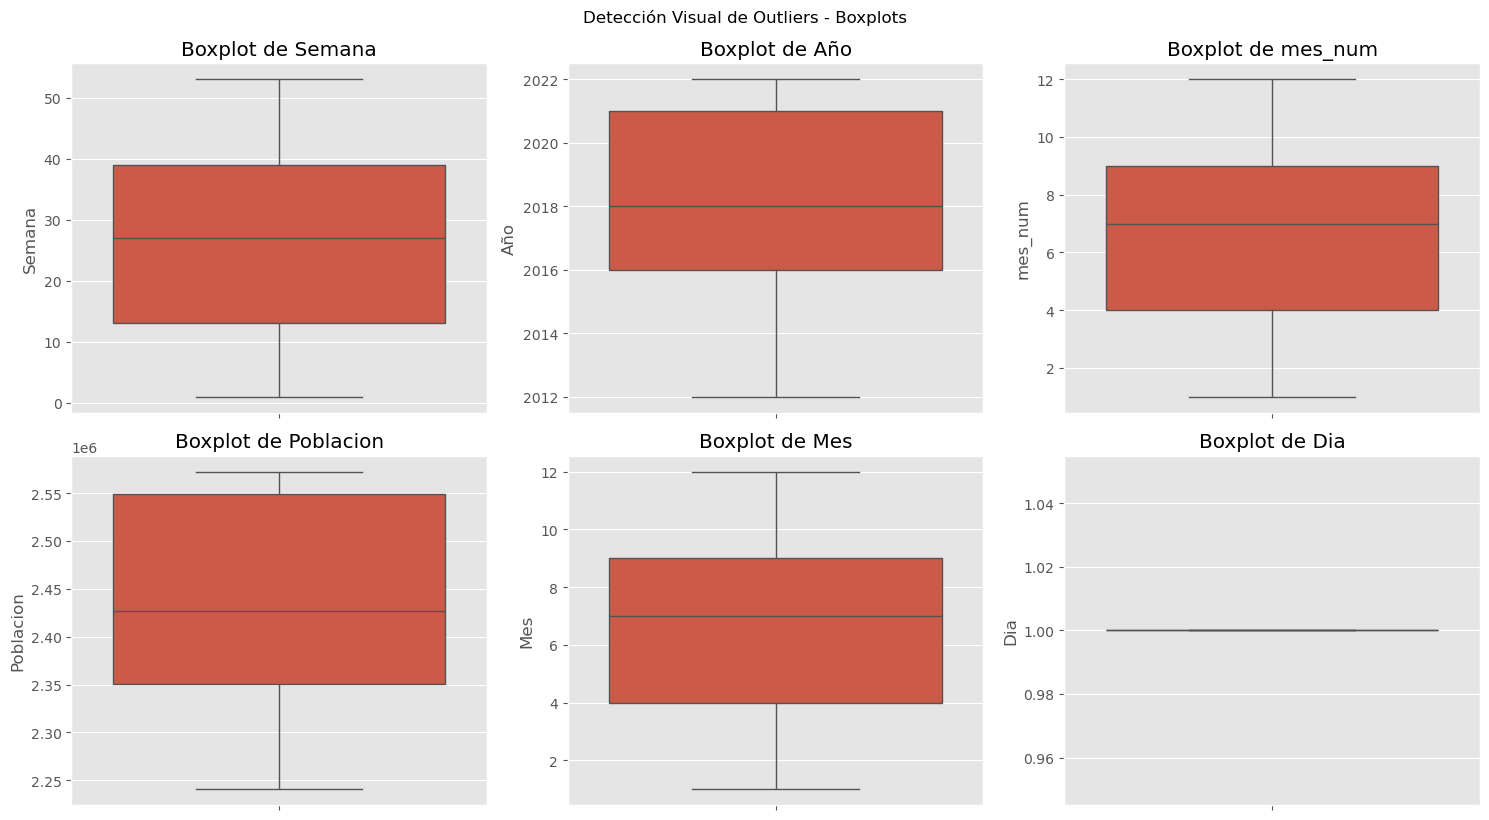

In [59]:
# Crear boxplots para cada variable numérica
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
plt.suptitle('Detección Visual de Outliers - Boxplots', y=1.02)
plt.show()

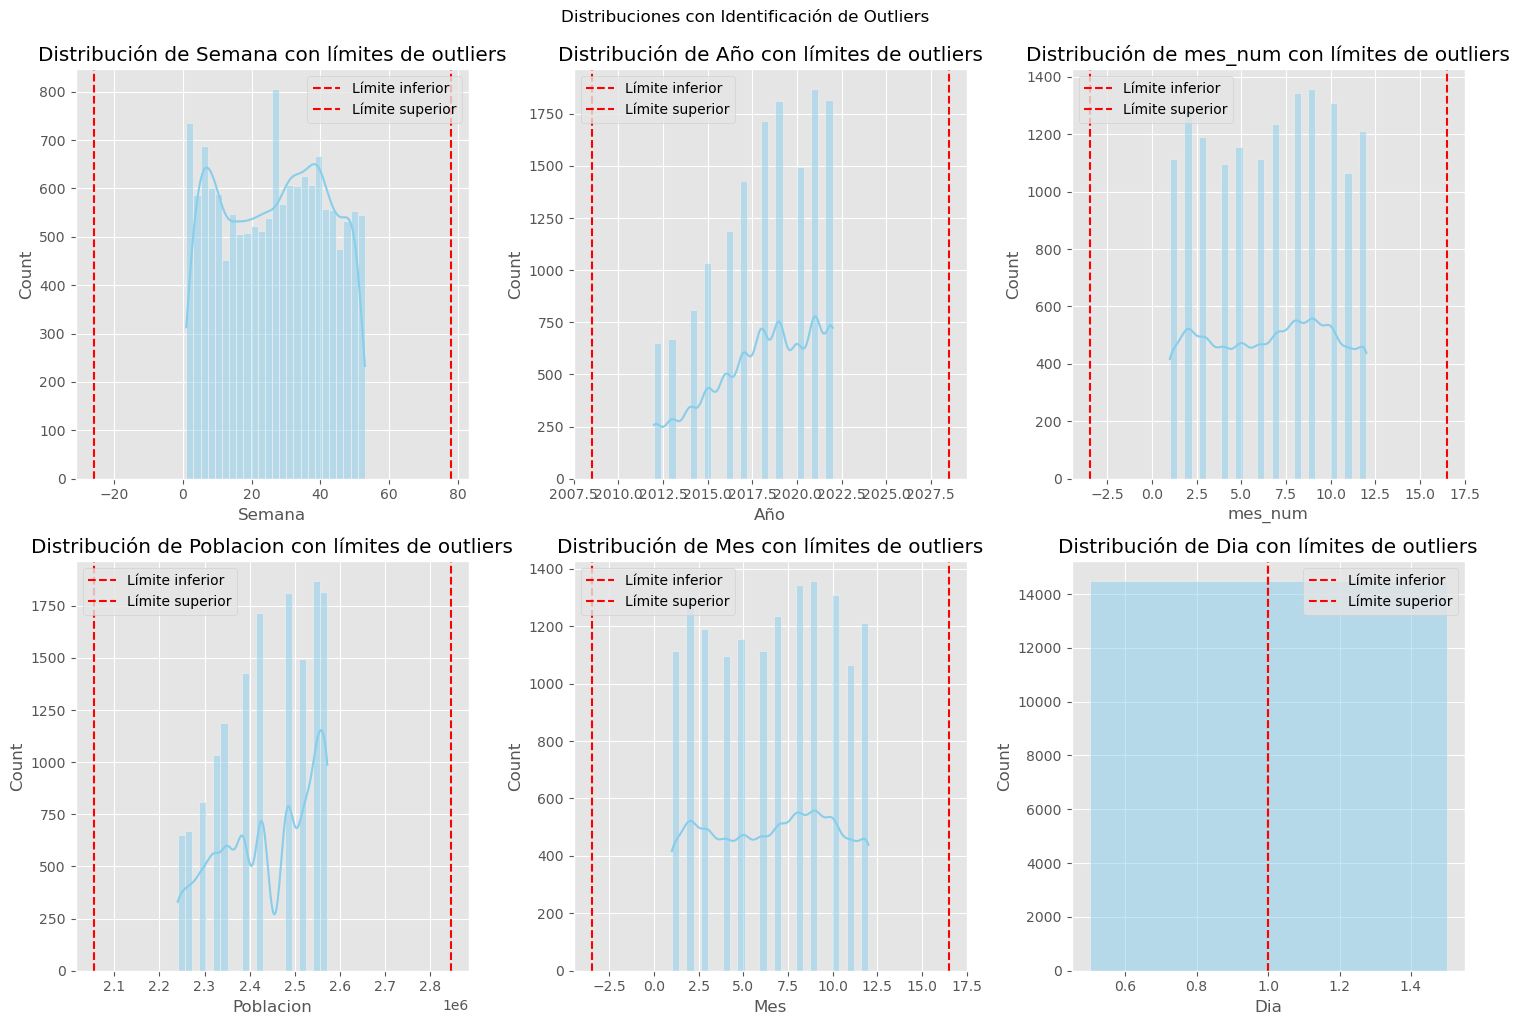

In [61]:
# Histogramas con marcación de outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    
    # Calcular límites para outliers
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Crear histograma
    sns.histplot(df[col], kde=True, color='skyblue')
    
    # Marcar outliers
    plt.axvline(lower_bound, color='red', linestyle='--', label='Límite inferior')
    plt.axvline(upper_bound, color='red', linestyle='--', label='Límite superior')
    
    plt.title(f'Distribución de {col} con límites de outliers')
    plt.legend()
    plt.tight_layout()
plt.suptitle('Distribuciones con Identificación de Outliers', y=1.02)
plt.show()

El análisis no detectó outliers en las variables numéricas, lo cual puede deberse a que: (1) los datos están bien comportados (distribución uniforme/gaussiana sin extremos), (2) las variables temporales (Semana, Año, mes_num, Mes, Día) tienen rangos fijos (ej. semanas 1-52, meses 1-12), haciendo improbable la presencia de outliers, o (3) el método IQR no es sensible para estas distribuciones. En el caso de Poblacion, la ausencia de outliers sugiere que el valor es constante (mismo para todas las observaciones) o varía mínimamente por año sin superar los umbrales del IQR. 

In [65]:
from scipy import stats

# Calcular Z-scores para todas las columnas numéricas
z_scores = np.abs(stats.zscore(df[numeric_cols]))

# Definir umbral para outliers (generalmente 3)
threshold = 3

# Identificar filas con al menos un outlier
outlier_rows = np.where(z_scores > threshold)
outlier_indices = np.unique(outlier_rows[0])

print(f"\nNúmero total de filas con al menos un outlier (Z-score > {threshold}): {len(outlier_indices)}")
print(f"Porcentaje del total: {len(outlier_indices)/len(df)*100:.2f}%")

# Mostrar algunas filas con outliers
if len(outlier_indices) > 0:
    print("\nEjemplo de filas con outliers:")
    print(df.iloc[outlier_indices[:5]][numeric_cols])


Número total de filas con al menos un outlier (Z-score > 3): 0
Porcentaje del total: 0.00%


El análisis con Z-scores confirma la ausencia de outliers significativos en las variables numéricas, coincidiendo con los resultados previos del método IQR. Esto se explica por la naturaleza de los datos: las variables temporales (Semana, Mes, Día) tienen rangos fijos que limitan la aparición de valores atípicos, mientras que la columna de Población muestra baja variabilidad (posiblemente constante por año). La consistencia en estos resultados sugiere que los datos están bien normalizados o representan una realidad epidemiológica sin eventos extremos, lo que indica alta calidad y coherencia en el dataset.


Porcentaje de valores faltantes por columna:
Semana                 0.0
Año                    0.0
Nombre Nacionalidad    0.0
Sexo                   0.0
Estrato                0.0
Grupo Edad             0.0
mes_num                0.0
mes_nombre             0.0
Poblacion              0.0
Fecha                  0.0
count                  0.0
dtype: float64


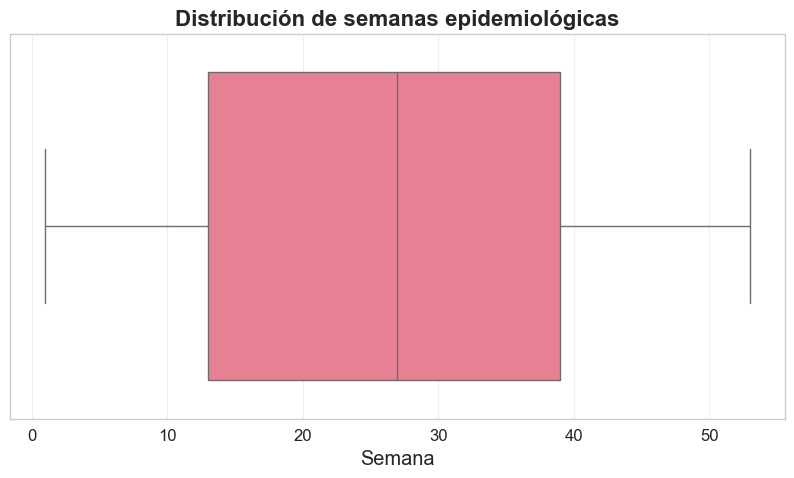


Grupos de edad con menos de 10 casos:
Grupo Edad
15-18    1
Name: count, dtype: int64


In [225]:
# Verificar valores faltantes
print("\nPorcentaje de valores faltantes por columna:")
print((df.isnull().sum() / len(df)) * 100)

# Identificar posibles outliers en semanas epidemiológicas
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Semana'])
plt.title('Distribución de semanas epidemiológicas')
plt.xlabel('Semana')
plt.show()

# Identificar grupos de edad con pocos casos
print("\nGrupos de edad con menos de 10 casos:")
print(df['Grupo Edad'].value_counts()[df['Grupo Edad'].value_counts() < 10])